In [1]:
from cil.framework import ImageGeometry
from cil.utilities.jupyter import islicer
from cil.utilities.display import show2D, show1D, show_geometry
from cil.processors import CentreOfRotationCorrector, TransmissionAbsorptionConverter, RingRemover, Padder, Slicer
from cil.recon import FBP
from cil.io import NEXUSDataWriter
from cil.io.utilities import HDF5_utilities
import numpy as np
import os
import hdf5plugin
from cil.framework import AcquisitionGeometry, AcquisitionData
import matplotlib.pyplot as plt
from tomopy.prep.phase import retrieve_phase
from cil.io import NEXUSDataWriter, NEXUSDataReader

/home/bgb37495/miniconda3/envs/cil_esrf/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [ ]:
i=0
alphas = [0.01, 0.05, 0.1, 0.5, 1, 5]
for alpha in alphas:

    file_name='sigma05_reco_alpha_loop_'+str(i)+'.nxs'
    reader = NEXUSDataReader()
    reader.set_up(file_name=file_name)
    reco = reader.read()
    reco.apply_circular_mask(0.9)
    show2D(reco.array, title=alpha, fix_range=(reco.max()*0.5, reco.max()*1))
    show2D(reco.array[1000:2000,1000:2000], title=alpha, fix_range=(reco.max()*0.5, reco.max()*1))
    i=i+1
    
plt.ylabel('Objective')
plt.xlabel('Iterations')
plt.grid()

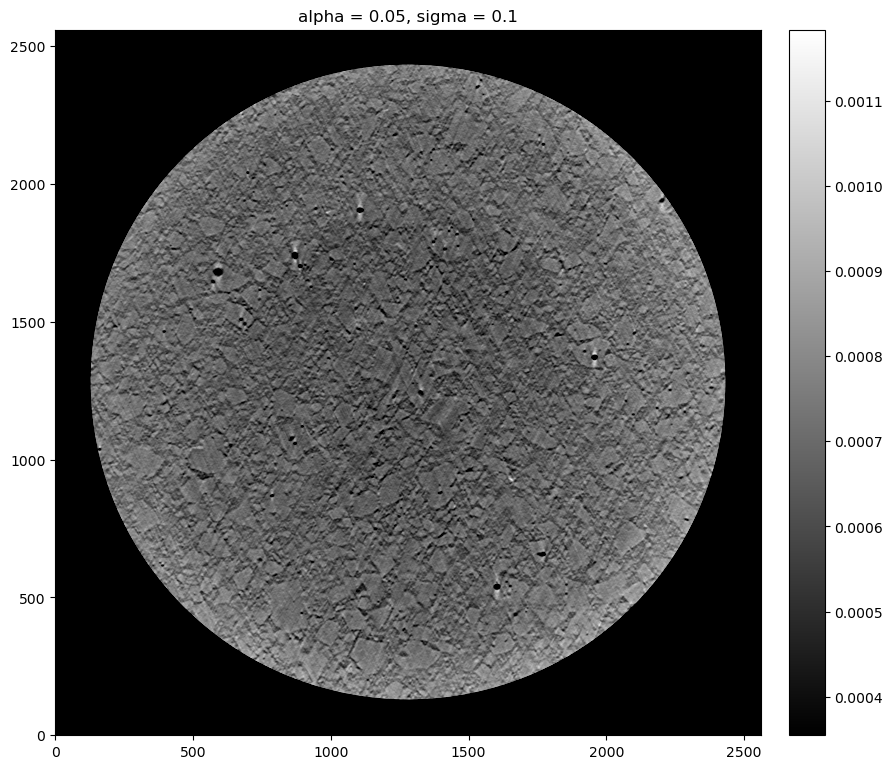

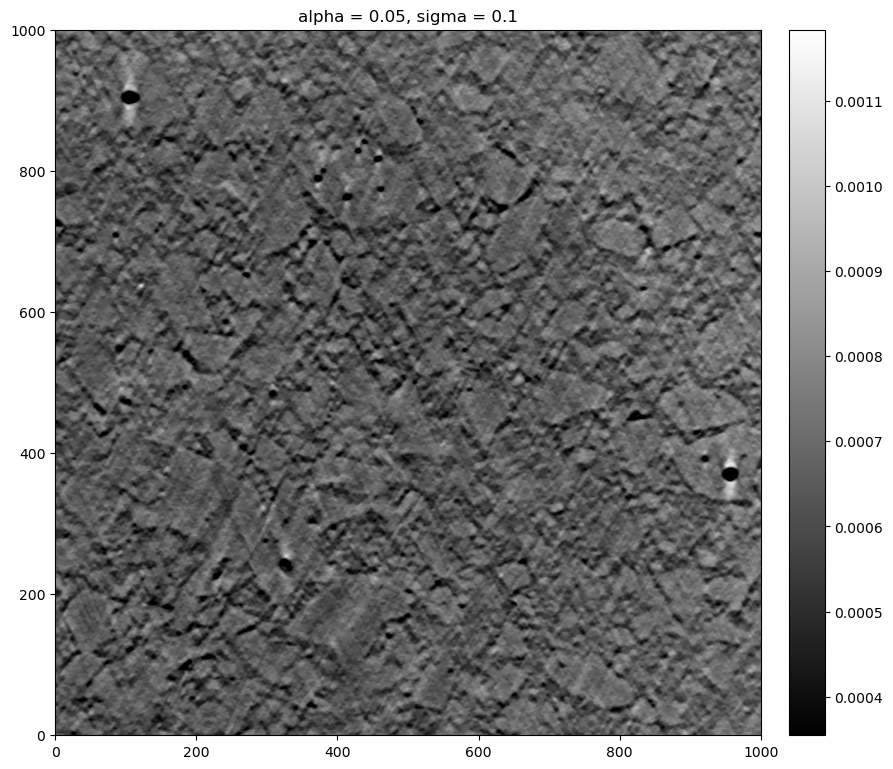

In [12]:
file_name='long_sigma01_reco_alpha005.nxs'
reader = NEXUSDataReader()
reader.set_up(file_name=file_name)
reco = reader.read()
reco.apply_circular_mask(0.9)
show2D(reco.array, title='alpha = 0.05, sigma = 0.1', fix_range=(reco.max()*0.3, reco.max()*1))
show2D(reco.array[1000:2000,1000:2000], title='alpha = 0.05, sigma = 0.1', fix_range=(reco.max()*0.3, reco.max()*1))

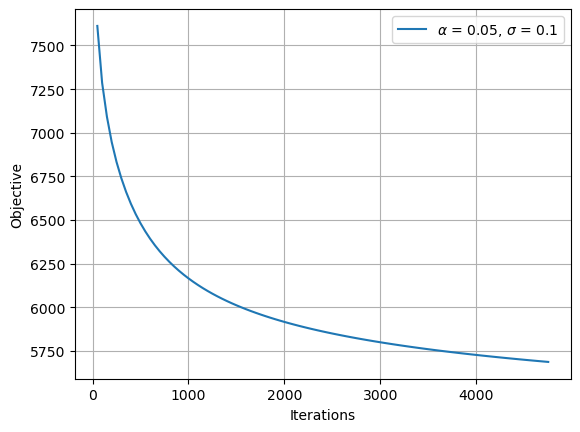

In [13]:
obj = np.load('long_sigma01_obj_alpha005.npy')
plt.plot(50+np.arange(len(obj[5:-1]))*50,obj[5:-1], label=r'$\alpha$ = 0.05, $\sigma$ = 0.1')
plt.ylabel('Objective')
plt.xlabel('Iterations')
plt.grid()
plt.legend()

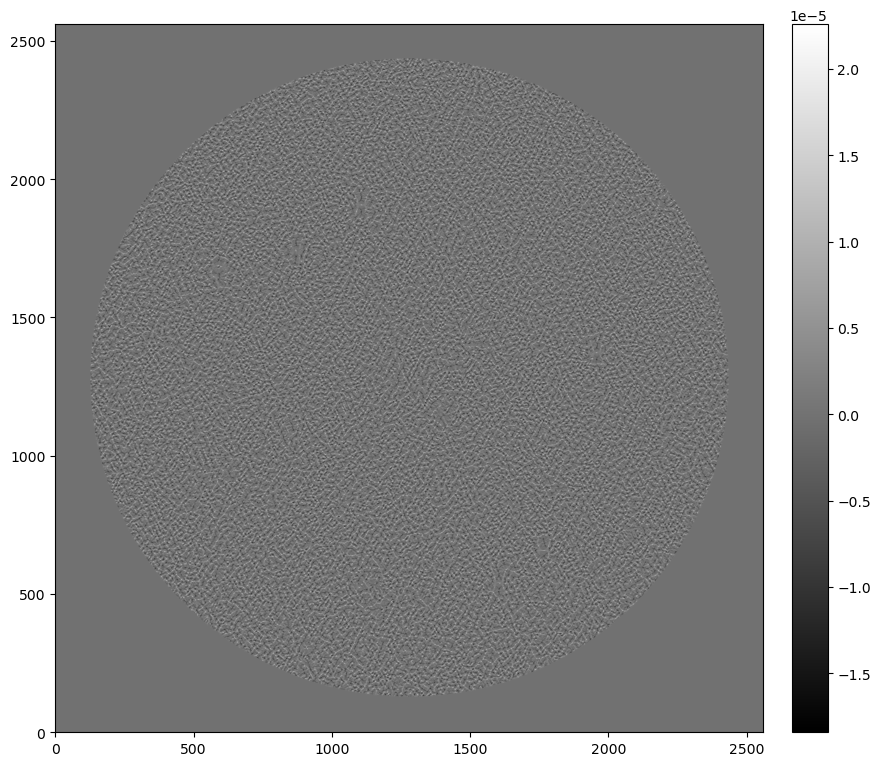

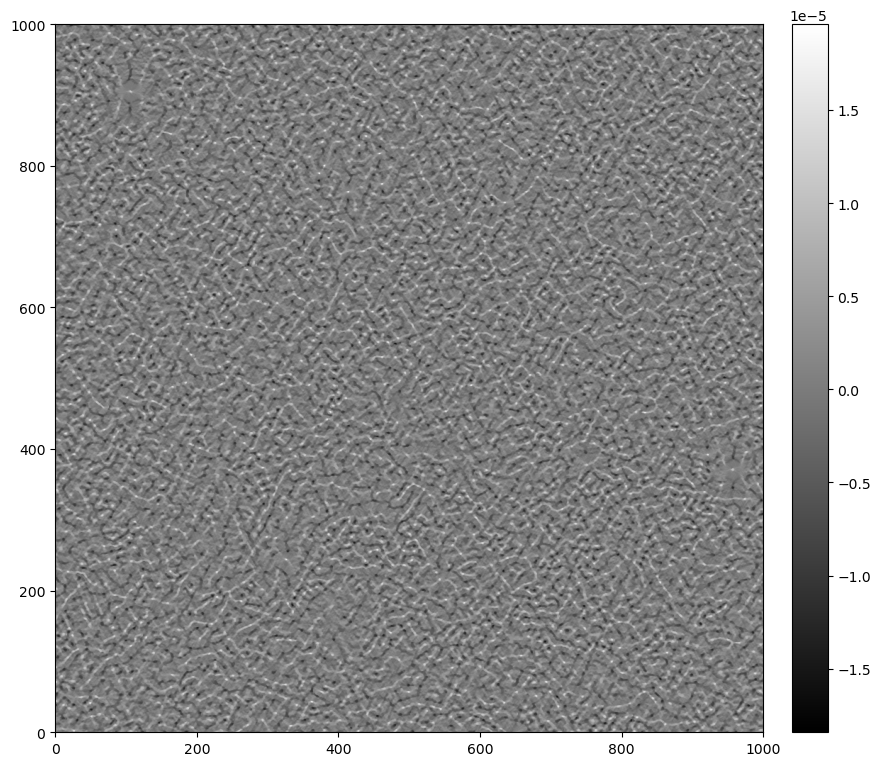

In [27]:
file_name='sigma05_reco_alpha_loop_3.nxs'
reader = NEXUSDataReader()
reader.set_up(file_name=file_name)

reco = reader.read()
reco.apply_circular_mask(0.9)

file_name='sigma05_reco_alpha_loop_2.nxs'
reader = NEXUSDataReader()
reader.set_up(file_name=file_name)

reco2 = reader.read()
reco2.apply_circular_mask(0.9)


show2D(reco.array - reco2.array)
show2D(reco.array[1000:2000,1000:2000] - reco2.array[1000:2000,1000:2000])

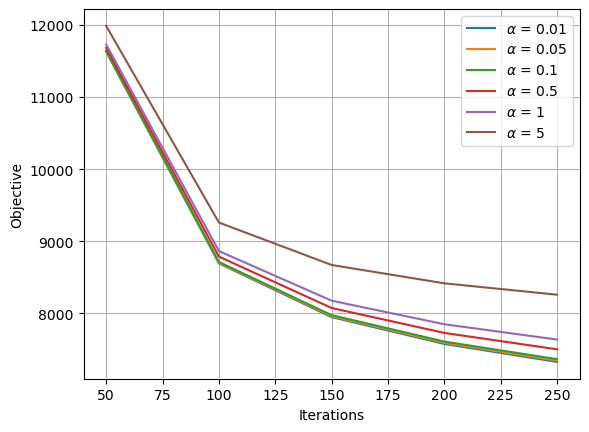

In [30]:
i=0
alphas = [0.01, 0.05, 0.1, 0.5, 1, 5]
for alpha in alphas:

    obj = np.load('sigma05_obj_alpha_loop_' + str(i) + '.npy')
    plt.plot(50+np.arange(len(obj[1:-1]))*50,obj[1:-1], label=r'$\alpha$ = ' + str(alpha))
    
    i=i+1
plt.ylabel('Objective')
plt.xlabel('Iterations')
plt.grid()
plt.legend()

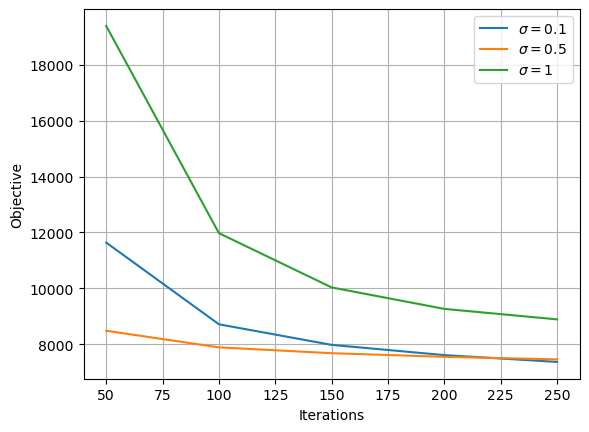

In [28]:
obj = np.load('sigma05_obj_alpha_loop_2.npy')
plt.plot(50+np.arange(len(obj[1:-1]))*50,obj[1:-1])

obj = np.load('sigma01_obj_alpha_01.npy')
plt.plot(50+np.arange(len(obj[1:-1]))*50,obj[1:-1])

obj = np.load('sigma1_obj_alpha_01.npy')
plt.plot(50+np.arange(len(obj[1:-1]))*50,obj[1:-1])

plt.ylabel('Objective')
plt.xlabel('Iterations')
plt.grid()
plt.legend([r'$\sigma = 0.1$', r'$\sigma = 0.5$', r'$\sigma = 1$'])

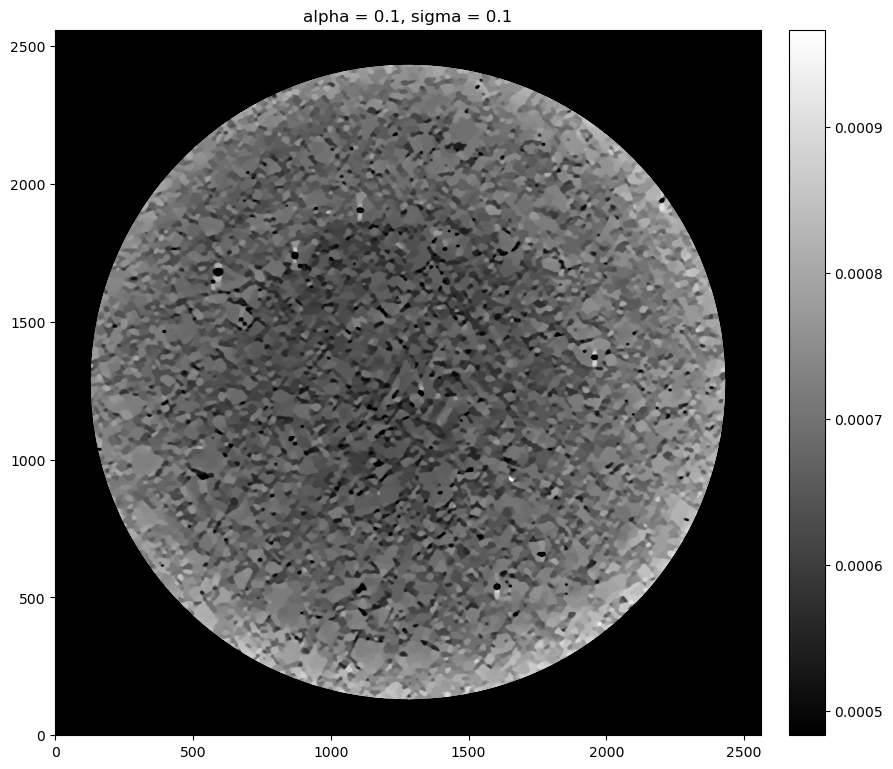

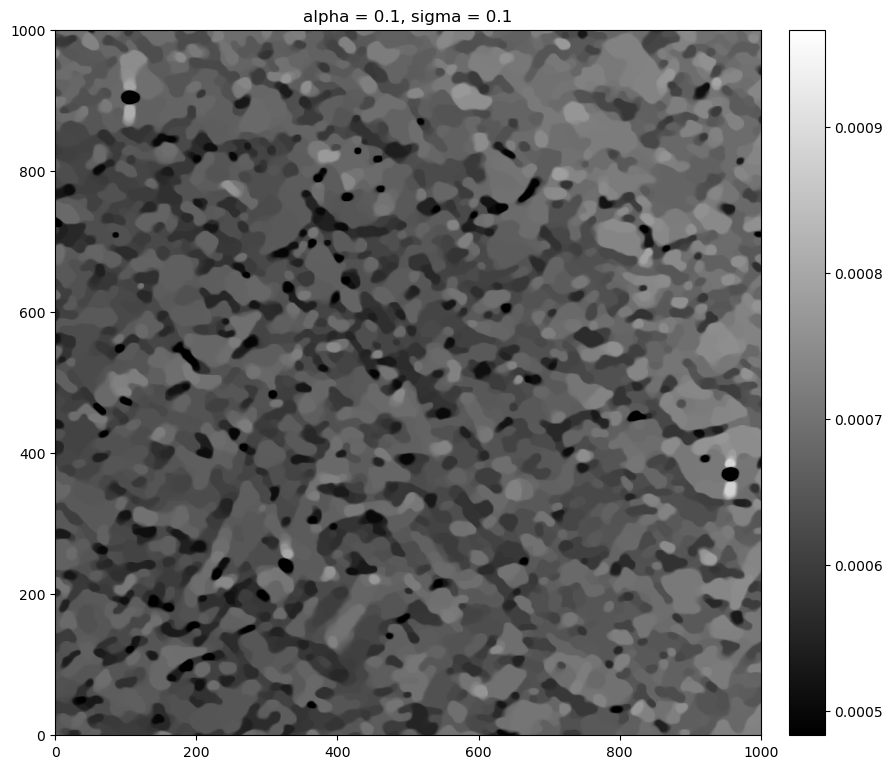

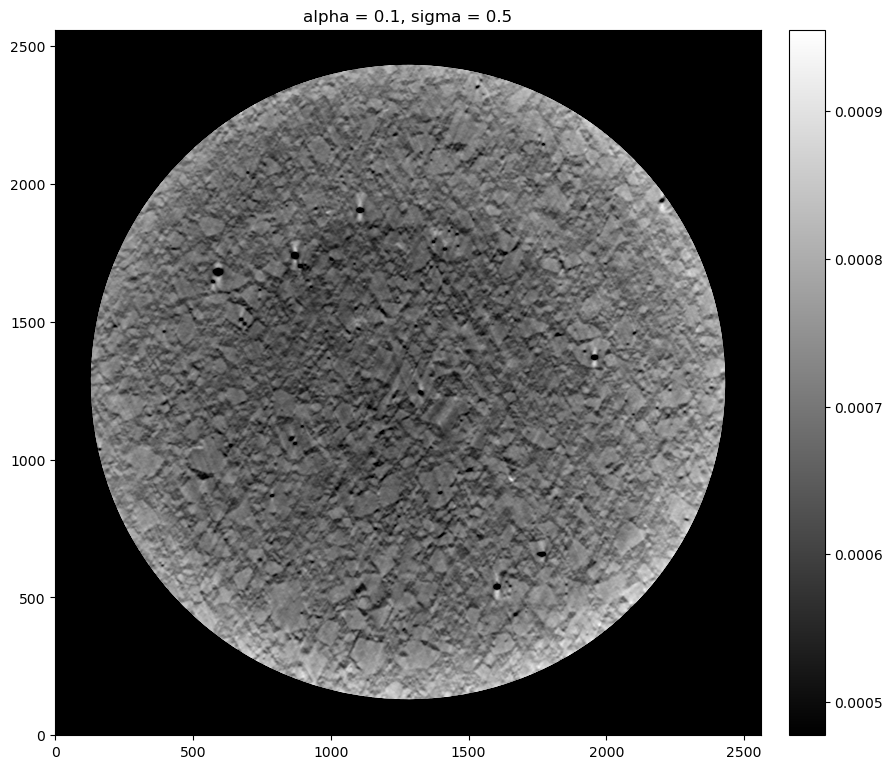

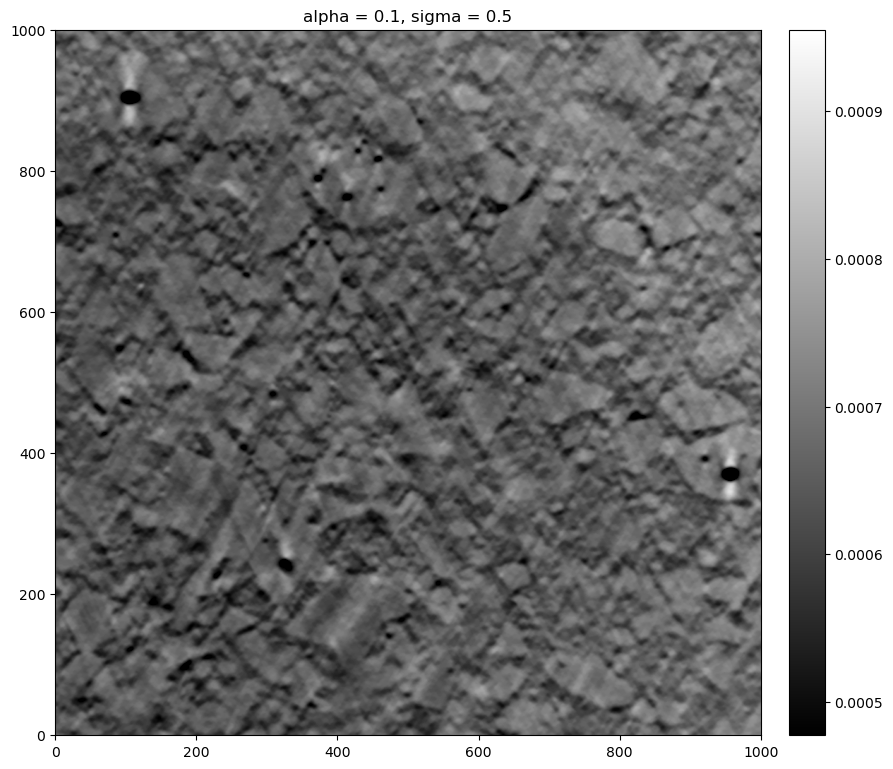

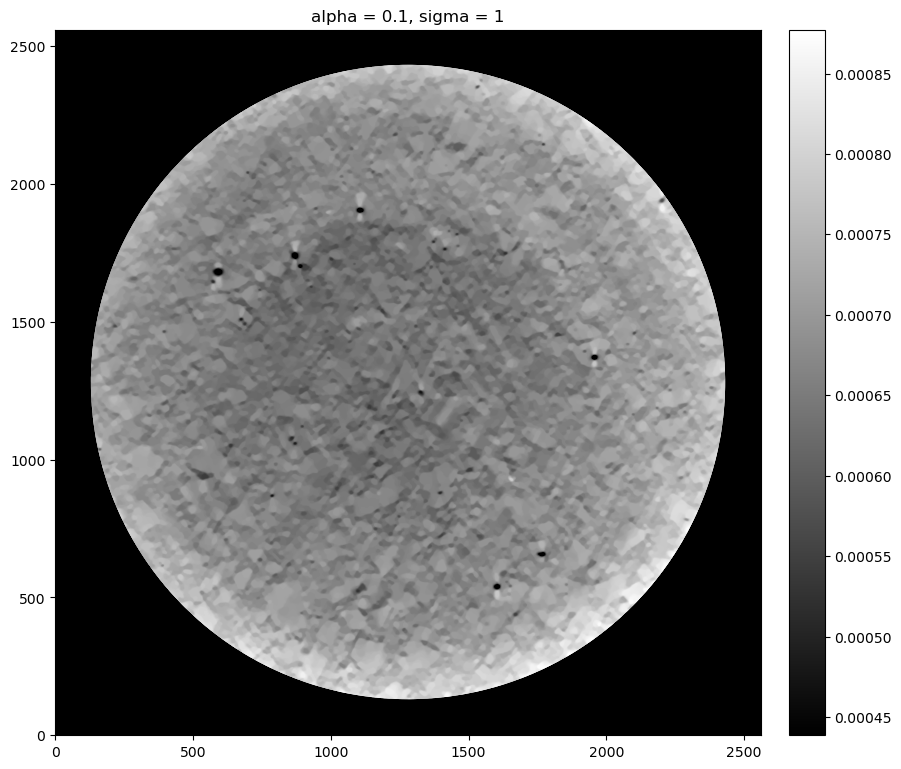

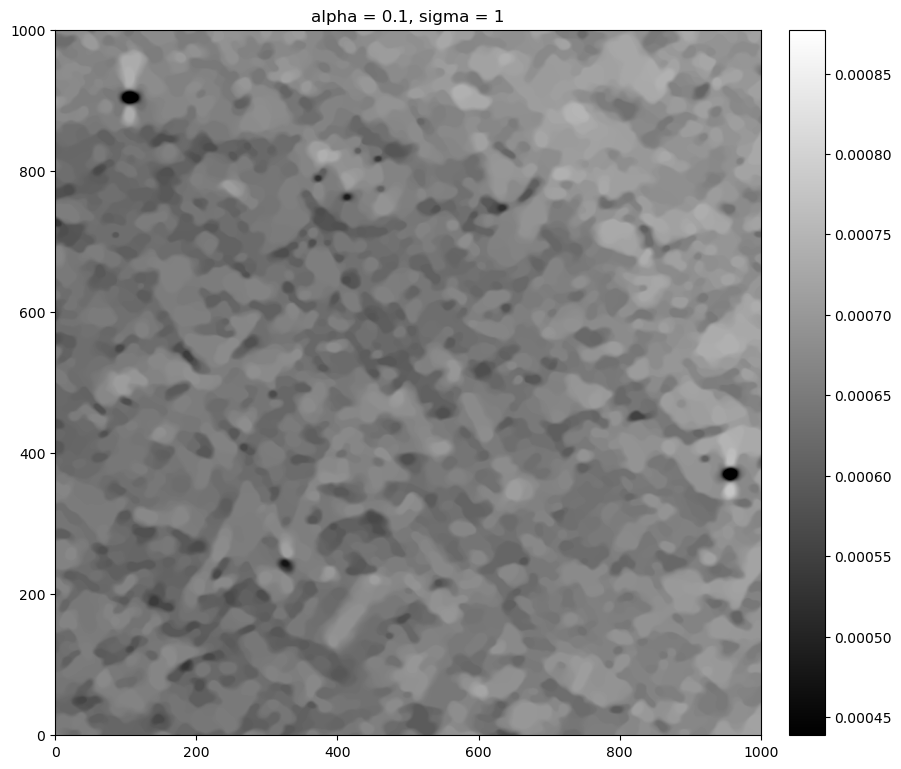

In [39]:
alpha = 0.1
file_name='sigma01_reco_alpha_01.nxs'
reader = NEXUSDataReader()
reader.set_up(file_name=file_name)
reco = reader.read()
reco.apply_circular_mask(0.9)
show2D(reco.array, title='alpha = 0.1, sigma = 0.1', fix_range=(reco.max()*0.5, reco.max()*1))
show2D(reco.array[1000:2000,1000:2000], title='alpha = 0.1, sigma = 0.1', fix_range=(reco.max()*0.5, reco.max()*1))

file_name='sigma05_reco_alpha_loop_2.nxs'
reader = NEXUSDataReader()
reader.set_up(file_name=file_name)
reco = reader.read()
reco.apply_circular_mask(0.9)
show2D(reco.array, title='alpha = 0.1, sigma = 0.5', fix_range=(reco.max()*0.5, reco.max()*1))
show2D(reco.array[1000:2000,1000:2000], title='alpha = 0.1, sigma = 0.5', fix_range=(reco.max()*0.5, reco.max()*1))

file_name='sigma1_reco_alpha_01.nxs'
reader = NEXUSDataReader()
reader.set_up(file_name=file_name)
reco = reader.read()
reco.apply_circular_mask(0.9)
show2D(reco.array, title='alpha = 0.1, sigma = 1', fix_range=(reco.max()*0.5, reco.max()*1))
show2D(reco.array[1000:2000,1000:2000], title='alpha = 0.1, sigma = 1', fix_range=(reco.max()*0.5, reco.max()*1))